##Part1 - Data Preprocessing

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [38]:
training_set = data_train.iloc[:,1:2].values

In [39]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [41]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

##Creating a data structures with 60 timesteps and 1 output

In [42]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [43]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [44]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

##Reshaping

In [45]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [46]:
x_train.shape

(1198, 60, 1)

##Building the RNN

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

###Initializing The RNN

In [48]:
regressor = Sequential()

In [49]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape= (x_train.shape[1],1)))

In [50]:
regressor.add(Dropout(0.2))

In [51]:
#Second Layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [52]:
#Third Layer
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [53]:
#Fourth Layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [54]:
#Output Layer
regressor.add(Dense(units = 1))

In [55]:
#Compilinh the RNN
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [56]:
#Fitting the RNN to the training set
regressor.fit(x_train,y_train,epochs=100,batch_size = 32)


Epoch 1/100
38/38 [==============================] - 8s 16ms/step - loss: 0.0430
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 3/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 13/100
38/38 [=====

##Making the predictions and visualizing the results

In [57]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

###Getting the predicted stock price of 2017

In [58]:
dataset_total = pd.concat((data_train['Open'],dataset_test["Open"]),axis = 0)

In [59]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [60]:
inputs = inputs.reshape(-1,1)

In [61]:
inputs = sc.transform(inputs)

In [62]:
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [63]:
predicted_stock_price = regressor.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [64]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

###Visulising the results

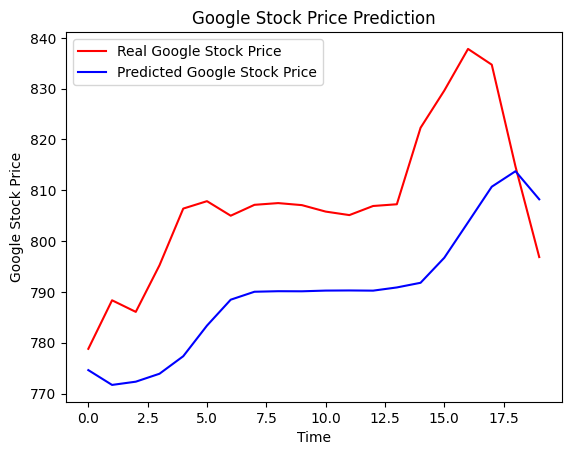

In [65]:
plt.plot(real_stock_price,color='Red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color='Blue',label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
